<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Computer-Vision/blob/main/2348505_CV_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

**Download any image dataset of your own. Perform image preprocessing**

In [ ]:
path = '/content/drive/MyDrive/DATASETS/Lab5 Dataset'

train = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,brightness_range=[1.0,2.0],rotation_range=20,validation_split=0.2)
train_generator = train.flow_from_directory(path,target_size=(224, 224),batch_size=32,class_mode='categorical')
print("Class indices:")
print(train_generator.class_indices)

Found 300 images belonging to 5 classes.
Class indices:
{'cat': 0, 'dog': 1, 'goldfish': 2, 'lizard': 3, 'woodpecker': 4}


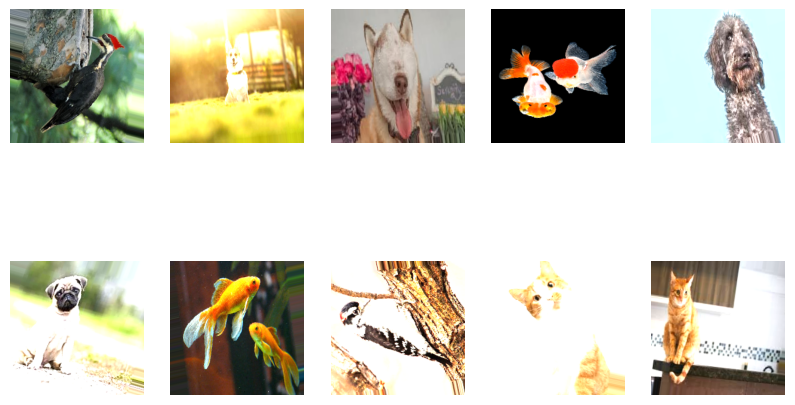

In [ ]:
#Visualize some of the preprocess images
x_batch, y_batch = next(train_generator)
fig, axs = plt.subplots(2, 5,figsize=(10,6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_batch[i])
    ax.axis('off')
plt.show()

# **Extract any 3 image features from the image dataset**

---

Finding lines in an image is probably the simplest feature extraction. Its goal is to identify which pixel is on an edge. An edge is defined as a gradient on the pixel intensity. In other words, if there is an abrupt color change, it is considered an edge.

**Line Detection**

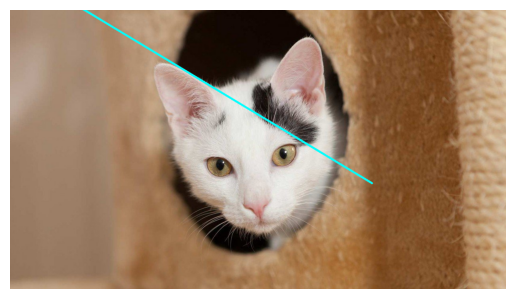

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DATASETS/Lab5 Dataset/cat/00357563a7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200, apertureSize=3)
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=120)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1, y1), (x2, y2), (255,255,0),3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Point Detection**

(-0.5, 1239.5, 697.5, -0.5)

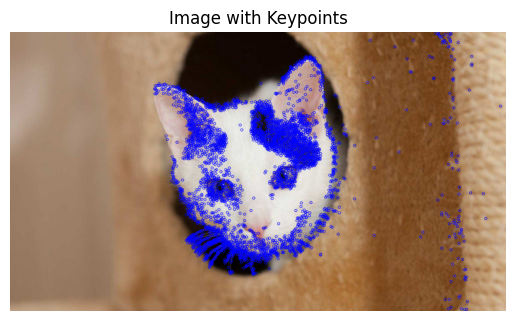

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(gray_image, None)
keypoints_image = cv2.drawKeypoints(img, keypoints, None, color=(255, 0, 0))

edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
plt.imshow(cv2.cvtColor(keypoints_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Keypoints")
plt.axis('off')

**Edge Detection**

(-0.5, 1239.5, 697.5, -0.5)

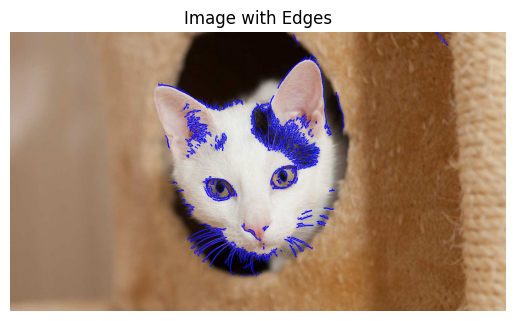

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
img[edges == 255] = (255,0,0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image with Edges")
plt.axis('off')

**Corner Detection**

---

Harris Corner Detection is a method used to identify significant variations in intensity, which often correspond to the corners of objects in an image. OpenCV offers a simple and efficient implementation of this technique, allowing us to detect corners that serve as prominent features for image analysis and matching.

(-0.5, 1239.5, 697.5, -0.5)

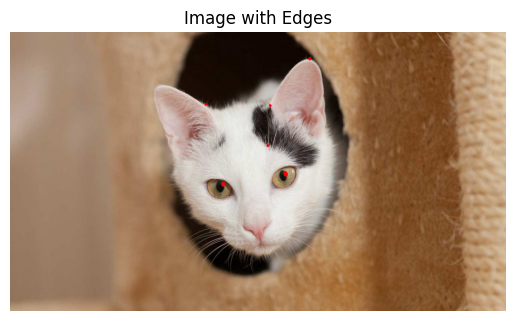

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DATASETS/Lab5 Dataset/cat/00357563a7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray, 3, 5, 0.1)
corners = dst > 0.05 * dst.max()
coord = np.argwhere(corners)
for y, x in coord:
    cv2.circle(img, (x,y), 3, (0,0,255), -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image with Edges")
plt.axis('off')